In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # Para formatear los ejes

# Datos de la Tabla 1
data = {
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
            'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    'Pasajeros': [24062781, 27090298, 26385337, 28883521, 28834005, 25746635,
                  27616682, 29512018, 28869001, 29850858, 28418127, 29071347],
    '% del total anual': [7.20, 8.11, 7.89, 8.64, 8.63, 7.70,
                          8.26, 8.83, 8.64, 8.93, 8.51, 8.69]
}

df = pd.DataFrame(data)

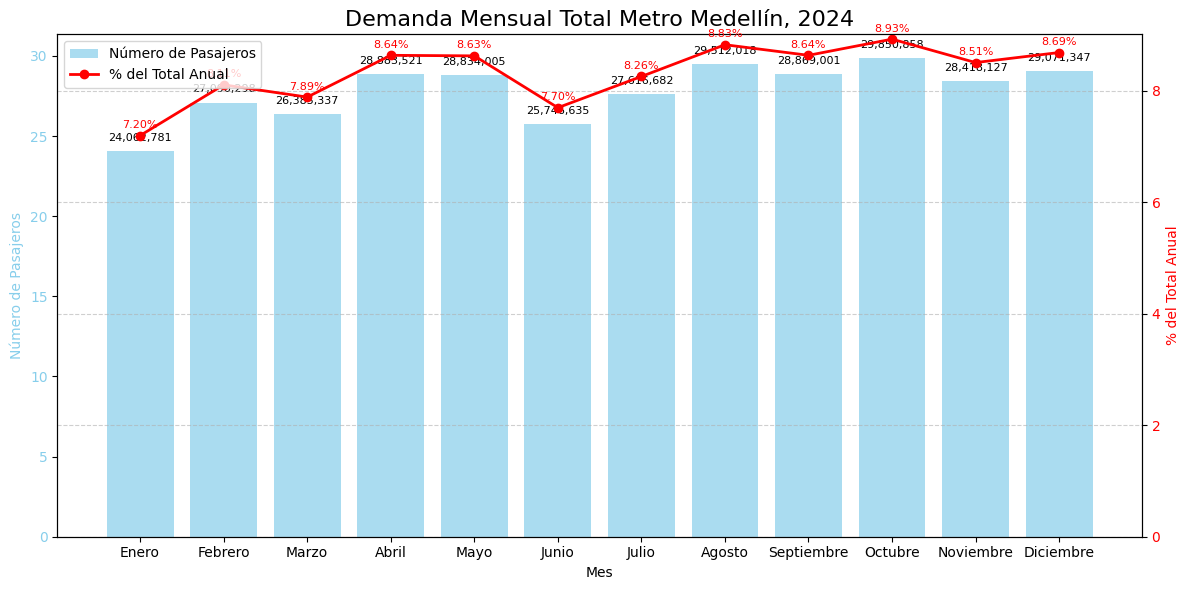

In [ ]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6)) # Ajusta el tamaño según necesites

# --- Eje Y Izquierdo (Pasajeros - Barras) ---
ax1.bar(df['Mes'], df['Pasajeros'], color='skyblue', alpha=0.7, label='Número de Pasajeros')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Número de Pasajeros', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Demanda Mensual Total Metro Medellín, 2024', fontsize=16)

# Formatear los números de pasajeros para que sean más legibles (ej. millones)
formatter = mticker.FormatStrFormatter('%1.0fM') # Formato para millones
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x/1000000), ','))) # Formato para que muestre 24,062,781 como 24.06M

# --- Eje Y Derecho (% del Total Anual - Línea) ---
ax2 = ax1.twinx() # Crea un segundo eje Y que comparte el mismo eje X
ax2.plot(df['Mes'], df['% del total anual'], color='red', marker='o', linestyle='-', linewidth=2, label='% del Total Anual')
ax2.set_ylabel('% del Total Anual', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(bottom=0) # Asegura que el eje de porcentaje empiece en 0 o un valor razonable

# Añadir etiquetas de valor en las barras (opcional, pero útil)
for i, v in enumerate(df['Pasajeros']):
    ax1.text(i, v + 500000, f'{v:,.0f}', color='black', ha='center', va='bottom', fontsize=8) # Ajusta el +500000 para la posición del texto

# Añadir etiquetas de valor en la línea (opcional, pero útil)
for i, v in enumerate(df['% del total anual']):
    ax2.text(i, v + 0.1, f'{v:.2f}%', color='red', ha='center', va='bottom', fontsize=8) # Ajusta el +0.1 para la posición del texto

# Añadir leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Mejorar el diseño
fig.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un diseño ajustado.
plt.grid(True, linestyle='--', alpha=0.6) # Añade una cuadrícula
plt.show()